# IBM Developer Skills Network

# Geometric Operations using Pillow

In [ ]:
# Image is in previous lessions

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [2]:
# Define a helper function to display images side by side
def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

# Geometric transformation

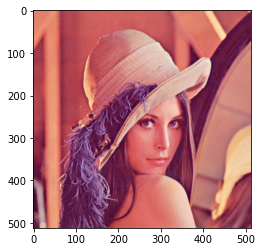

In [3]:
image = Image.open('lenna.png')
plt.imshow(image)
plt.show()

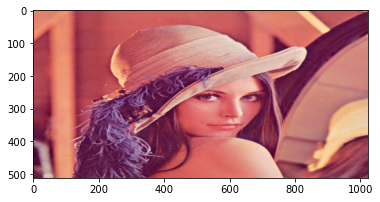

In [5]:
# Scale the hoz axis by 2, ver by 1
width, height = image.size
new_width = 2 * width
new_height = height
new_image = image.resize((new_width, new_height))
plt.imshow(new_image)
plt.show()

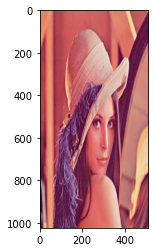

In [6]:
# scale ver by 2
width, height = image.size
new_width = width
new_height = 2*height
new_image = image.resize((new_width, new_height))
plt.imshow(new_image)
plt.show()

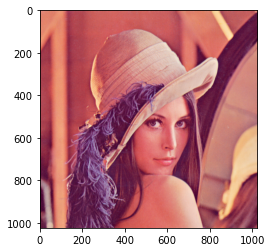

In [7]:
# scale both
width, height = image.size
new_width = 2 * width
new_height = 2* height
new_image = image.resize((new_width, new_height))
plt.imshow(new_image)
plt.show()

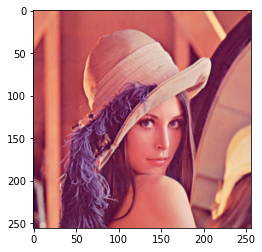

In [9]:
# Shrink by 1/2
width, height = image.size
new_width =  width // 2
new_height =  height // 2
new_image = image.resize((new_width, new_height))
plt.imshow(new_image)
plt.show()

## Rotation

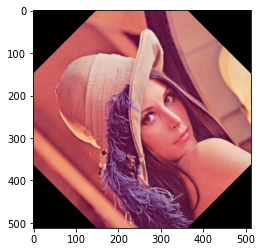

In [10]:
theta = 45 # degree
new_image = image.rotate(theta)
plt.imshow(new_image)
plt.show()

# Mathematical Operations

## Array Operations

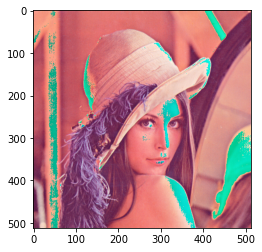

In [11]:
image = np.array(image) # convert to numpy array
new_image = image + 20 # add 20 to all
plt.imshow(new_image)
plt.show()

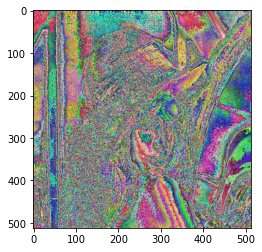

In [12]:
# Multiply with a value
new_image = image * 10
plt.imshow(new_image)
plt.show()

In [14]:
# Add 2 arrays of equal shape
Noise = np.random.normal(0, 20, (height, width, 3)).astype(np.uint8)
Noise.shape

(512, 512, 3)

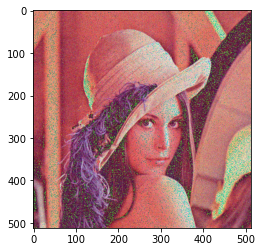

In [15]:
new_image = image + Noise
plt.imshow(new_image)
plt.show()

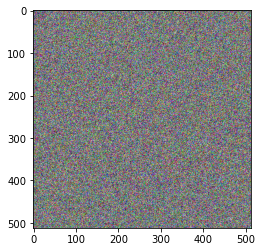

In [16]:
# Multiply 2 images of equal shape
new_image = image * Noise
plt.imshow(new_image)
plt.show()

## Matrix Operations

In [17]:
im_gray = Image.open('barbara.png')

In [18]:
from PIL import ImageOps
im_gray = ImageOps.grayscale(im_gray) # convert to 1 channel image

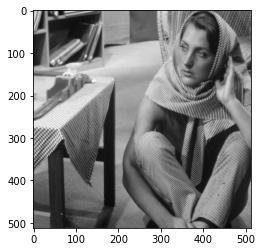

In [19]:
im_gray = np.array(im_gray)
plt.imshow(im_gray, cmap='gray')
plt.show()

In [20]:
# We can apply algorithms designed for matrices. 
# We can use Singular Value Decomposition, decomposing our image matrix into a product of three matrices
U, s, V = np.linalg.svd(im_gray, full_matrices=True)
s.shape

(512,)

In [21]:
# Convert s to diagonal matrix S
S = np.zeros((im_gray.shape[0], im_gray.shape[1]))
S[:image.shape[0], :image.shape[0]] = np.diag(s)

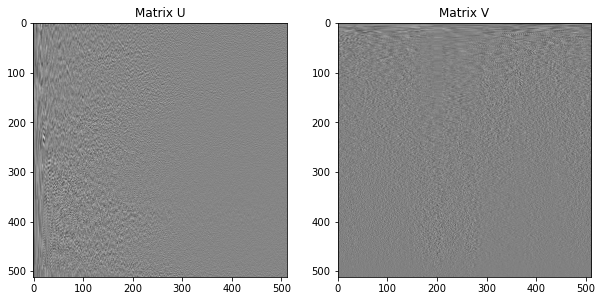

In [22]:
# Plot the U V
plot_image(U, V, title_1='Matrix U', title_2='Matrix V')

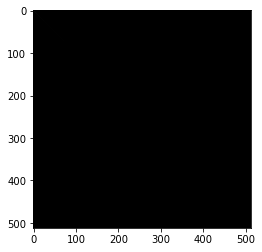

In [23]:
plt.imshow(S, cmap='gray')
plt.show()

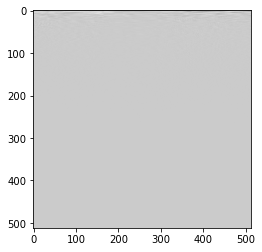

In [24]:
# We can find the matrix product of all the matrices. 
# First, we can perform matrix multiplication on S and U and assign it to B and plot the results:
B = S.dot(V)
plt.imshow(B, cmap='gray')
plt.show()

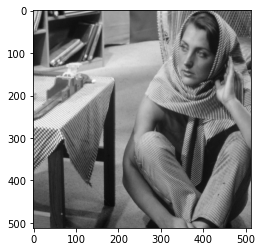

In [25]:
A = U.dot(B)
plt.imshow(A, cmap='gray')
plt.show()

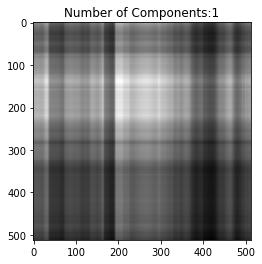

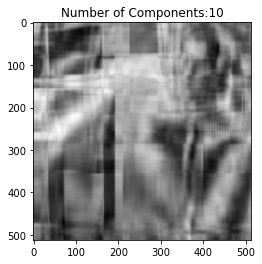

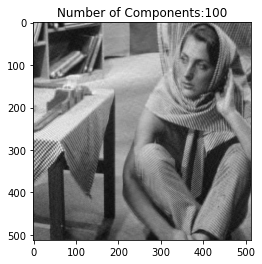

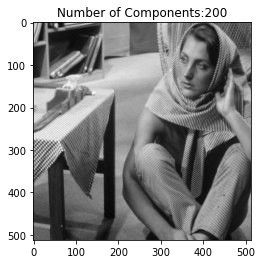

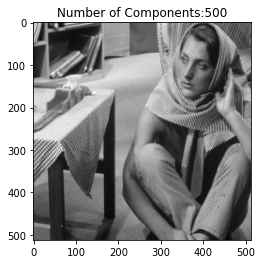

In [26]:
# It turns out that many elements are redundant. 
# We can eliminate some rows and columns of S and V and approximate the image by finding the product:
for n_component in [1,10,100,200, 500]:
    S_new = S[:, :n_component]
    V_new = V[:n_component, :]
    A = U.dot(S_new.dot(V_new))
    plt.imshow(A,cmap='gray')
    plt.title("Number of Components:"+str(n_component))
    plt.show()